# 导入所需库

In [ ]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# 加载20 Newsgroups数据集

In [ ]:
data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
X, y = data.data, data.target

# 使用TfidfVectorizer进行文本向量化

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# 定义评估函数

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    em = accuracy_score(y_test, y_pred)
    return f1, em

# 设置交叉验证

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 初始化结果存储

In [ ]:
f1_scores_no_reg = []
em_scores_no_reg = []
f1_scores_with_reg = []
em_scores_with_reg = []

# 开始训练和评估

In [ ]:
for train_idx, test_idx in cv.split(X_tfidf, y):
    X_train, X_test = X_tfidf[train_idx], X_tfidf[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # 不使用L2正则化
    model_no_reg = LogisticRegression(C=1e5, solver='lbfgs', max_iter=1000, multi_class='auto')
    f1, em = evaluate_model(model_no_reg, X_train, X_test, y_train, y_test)
    f1_scores_no_reg.append(f1)
    em_scores_no_reg.append(em)

    # 使用L2正则化
    model_with_reg = LogisticRegression(C=1.0, solver='lbfgs', max_iter=1000, multi_class='auto')
    f1, em = evaluate_model(model_with_reg, X_train, X_test, y_train, y_test)
    f1_scores_with_reg.append(f1)
    em_scores_with_reg.append(em)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

# 绘制结果

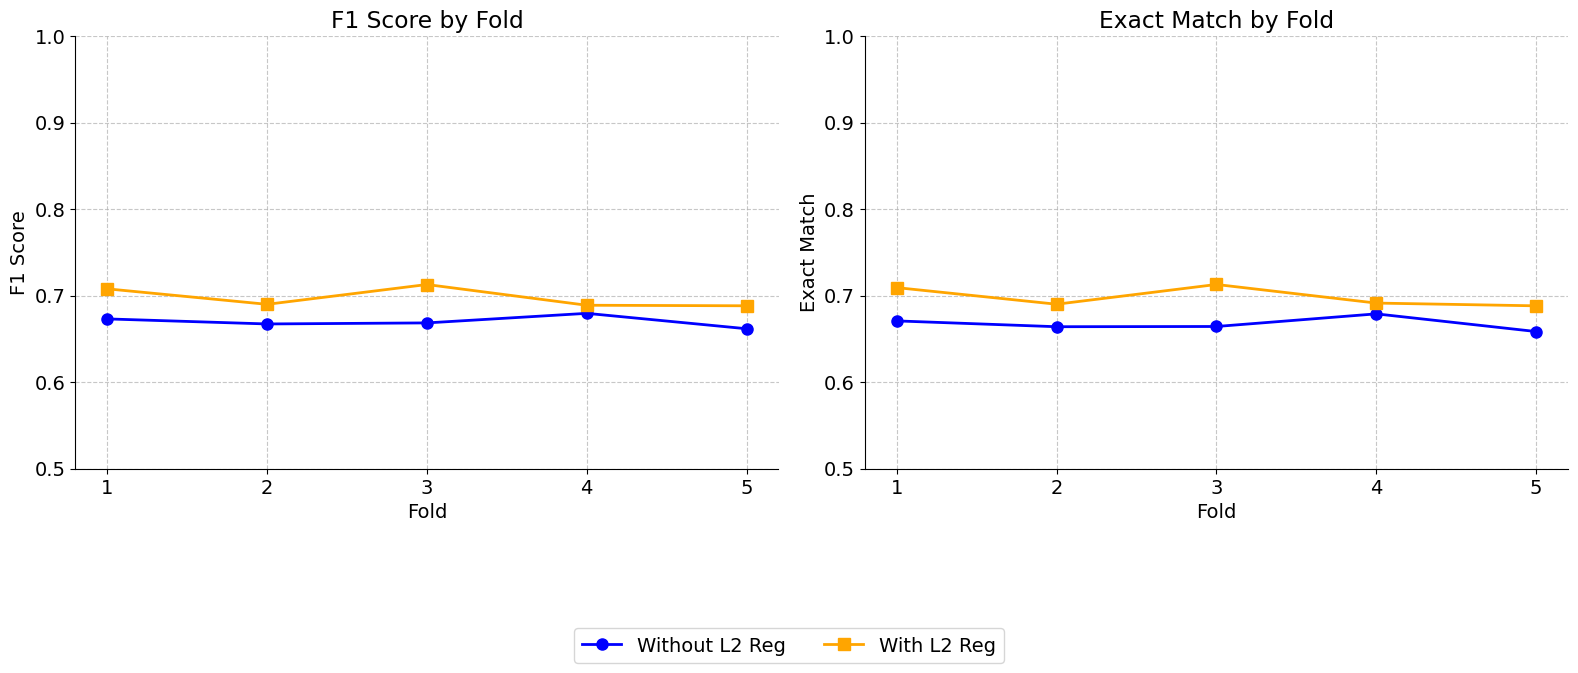

Average F1 Score Without L2 Regularization: 0.6701
Average Exact Match Without L2 Regularization: 0.6674
Average F1 Score With L2 Regularization: 0.6976
Average Exact Match With L2 Regularization: 0.6984


In [ ]:
x = np.arange(1, len(f1_scores_no_reg) + 1)

# 设置全局字体大小
plt.rcParams.update({'font.size': 14})

# 创建子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# F1 Score 图表
l1, = ax1.plot(x, f1_scores_no_reg, 'o-', label='Without L2 Reg', color='blue', linewidth=2, markersize=8)
l2, = ax1.plot(x, f1_scores_with_reg, 's-', label='With L2 Reg', color='orange', linewidth=2, markersize=8)

# EM Score 图表
l3, = ax2.plot(x, em_scores_no_reg, 'o-', label='Without L2 Reg', color='blue', linewidth=2, markersize=8)
l4, = ax2.plot(x, em_scores_with_reg, 's-', label='With L2 Reg', color='orange', linewidth=2, markersize=8)

# 设置图表属性
for ax in [ax1, ax2]:
    ax.set_xlabel('Fold')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_ylim([0.5, 1])  # 根据实际情况调整y轴范围
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

ax1.set_ylabel('F1 Score')
ax1.set_title('F1 Score by Fold')

ax2.set_ylabel('Exact Match')
ax2.set_title('Exact Match by Fold')

# 统一设置图例
fig.legend(handles=[l1, l2], loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

# 打印平均值
print("Average F1 Score Without L2 Regularization: {:.4f}".format(np.mean(f1_scores_no_reg)))
print("Average Exact Match Without L2 Regularization: {:.4f}".format(np.mean(em_scores_no_reg)))
print("Average F1 Score With L2 Regularization: {:.4f}".format(np.mean(f1_scores_with_reg)))
print("Average Exact Match With L2 Regularization: {:.4f}".format(np.mean(em_scores_with_reg)))